# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

`Для воспроизведения результатов экспериментов. Сохранение сида позволяет позднее повторить расчеты с такими же случайными результатами.`

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [73]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [3]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [4]:
df_train.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


In [5]:
df_train.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
6998,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [79]:
df_train.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [80]:
df_train.isnull().columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [75]:
df_trains_mis_columns = df_train.columns[df_train.isnull().any()]
df_trains_mis_columns

Index(['mileage', 'engine', 'max_power', 'torque', 'seats'], dtype='object')

In [9]:
df_train.duplicated().sum()

np.int64(985)

In [1]:
!pip install ydata-profiling==4.1.2
!pip install ipywidgets
!pip install ipython

  Using cached configuration-0.4.2.tar.gz (10 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/private/var/folders/r5/n1rpqd8j0556dtkwbvwf_hs40000gn/T/pip-install-5okm2_jb/configuration_13ff4ea851f34dd78d5ef94e978a4c50/setup.py", line 30, in <module>
          description = file(os.path.join(here, 'README.txt')).read()
      NameError: name 'file' is not defined. Did you mean: 'filter'?
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above f

In [6]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df_train, title="Profiling Report")

In [7]:
profile.to_file("eda_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [14]:
df_train_columns = ['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power',
       'seats']

In [ ]:
df_train.select_dtypes(include=np.number).median()

,0
year,2015.0
selling_price,450000.0
km_driven,60000.0
seats,5.0


In [76]:
def fill_missing(df_train,df_test):
    for column in df_trains_mis_columns:
        try:
          median_value = df_train[column].median()
          if column == 'miliage':
            median_value = 0
        except :
          median_value = 0
        if df_train[column].isnull().any():
            df_train[column].fillna(median_value, inplace=True)
        if df_test[column].isnull().any():
            df_test[column].fillna(median_value, inplace=True)
    return df_train,df_test

df_train,df_test = fill_missing(df_train,df_test)

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [16]:
features = df_train.drop(columns=['selling_price'])
duplicates = features.duplicated(keep=False)
print(f"Всего строк - {df_train.shape[0]}, дубликаты - {df_train[duplicates].shape[0]}")
df_train[duplicates].head()

Всего строк - 6999, дубликаты - 1799


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
22,Maruti Baleno Delta 1.2,2016,575000,45000,Petrol,Individual,Manual,First Owner,21.4 kmpl,1197 CC,83.1 bhp,115Nm@ 4000rpm,5.0
26,Maruti Omni E MPI STD BS IV,2018,254999,25000,Petrol,Individual,Manual,First Owner,16.8 kmpl,796 CC,34.2 bhp,59Nm@ 2500rpm,8.0
27,Maruti Vitara Brezza LDi Option,2017,670000,70000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
28,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,0,0,0,0,5.0
29,Maruti Omni 8 Seater BSIV,2012,150000,35000,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35 bhp,6.1kgm@ 3000rpm,5.0


In [17]:
df_train = df_train[~features.duplicated(keep='first')]

In [18]:
df_train.reset_index(drop=True, inplace=True)

In [19]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [81]:
#mileage, engine,max_power,torque
def preprocess(df):
    df['mileage'] = df['mileage'].astype(str).str.replace(' kmpl', '')
    df['mileage'] = df['mileage'].astype(str).str.replace(' km/kg', '').astype(float)
    df['engine'] = df['engine'].astype(str).str.replace(' CC', '').astype(float)
    df['max_power'] = df['max_power'].astype(str).str.replace(' bhp', '1 bhp')
    df['max_power'] = df['max_power'].astype(str).str.replace(' bhp', '').astype(float)
    return df

df_train = preprocess(df_train)
df_test = preprocess(df_test)

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [21]:
df_train['engine'] = df_train['engine'].fillna(0)

df_train.engine = df_train.engine.astype(int)
df_train.seats = df_train.seats.astype(int)

df_test['engine'] = df_test['engine'].fillna(0)

df_test.engine = df_test.engine.astype(int)
df_test.seats = df_test.seats.astype(int)

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [22]:
print("\nTrain:\n")
df_train.describe(include=[np.number])



Train:



,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,18.813920,1389.701027,373.846341,5.426712
std,4.095622,5.354320e+05,6.007114e+04,5.247306,546.195082,439.341340,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,0.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.200000,1193.000000,73.971000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.100000,1248.000000,99.420500,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,701.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,4001.000000,14.000000


In [23]:
print("\nTest:\n")
df_test.describe(include=[np.number])


Test:



,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,18.970780,1431.16400,402.188358,5.403000
std,4.012149,7.585539e+05,48486.218662,4.753277,557.99609,486.327347,0.912921
min,1995.000000,3.100000e+04,1303.000000,0.000000,0.00000,0.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,16.200000,1196.00000,81.801000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,19.250000,1248.00000,100.610000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,22.300000,1582.00000,731.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,32.260000,3604.00000,2801.000000,9.000000


In [24]:
print("\nTrain:\n")
df_train.describe(exclude=np.number)


Train:



,name,fuel,seller_type,transmission,owner,torque
count,5840,5840,5840,5840,5840,5840
unique,1924,4,3,2,5,420
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,190Nm@ 2000rpm
freq,91,3177,5223,5336,3603,390


In [ ]:
print("\nTest:\n")
df_test.describe(exclude=np.number)


Test:



,name,fuel,seller_type,transmission,owner,torque
count,1000,1000,1000,1000,1000,1000
unique,621,4,3,2,5,227
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,200Nm@ 1750rpm
freq,15,534,837,877,623,57


In [25]:
assert df_train.shape == (5840, 13)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

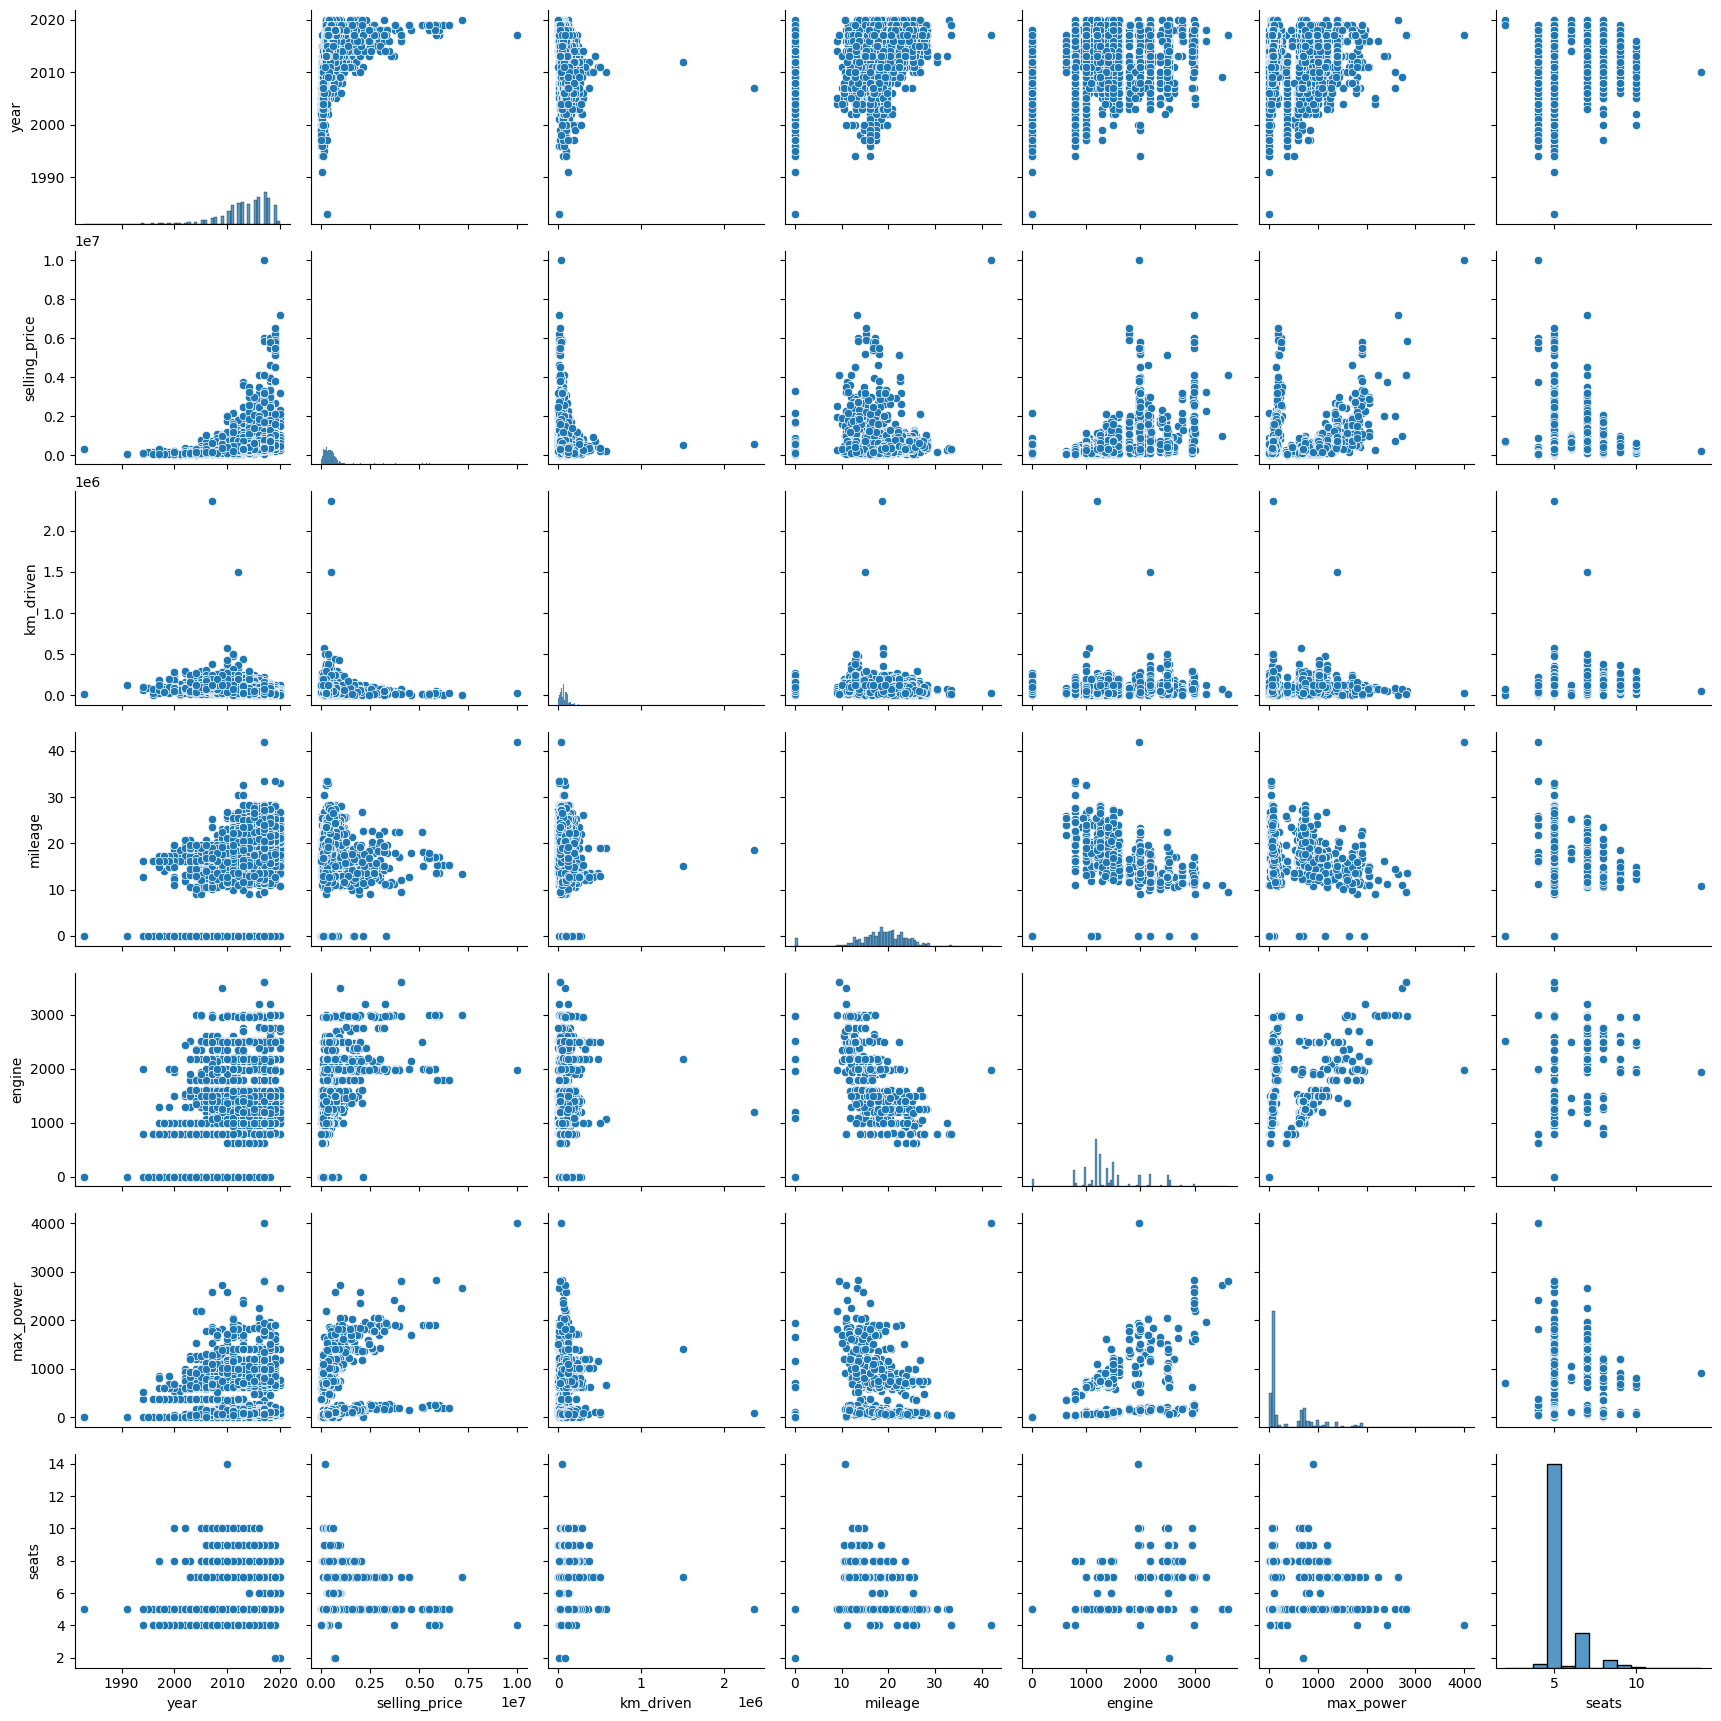

In [ ]:
import seaborn  as sns
sns.pairplot(df_train.select_dtypes(include=[np.number]))

Да, на целевую переменную selling_price, похоже, влияют такие переменные как engine и max_power.

Кроме того, можно предположить линейную зависимость почти всех признаков от года выпуска, что достаточно логично

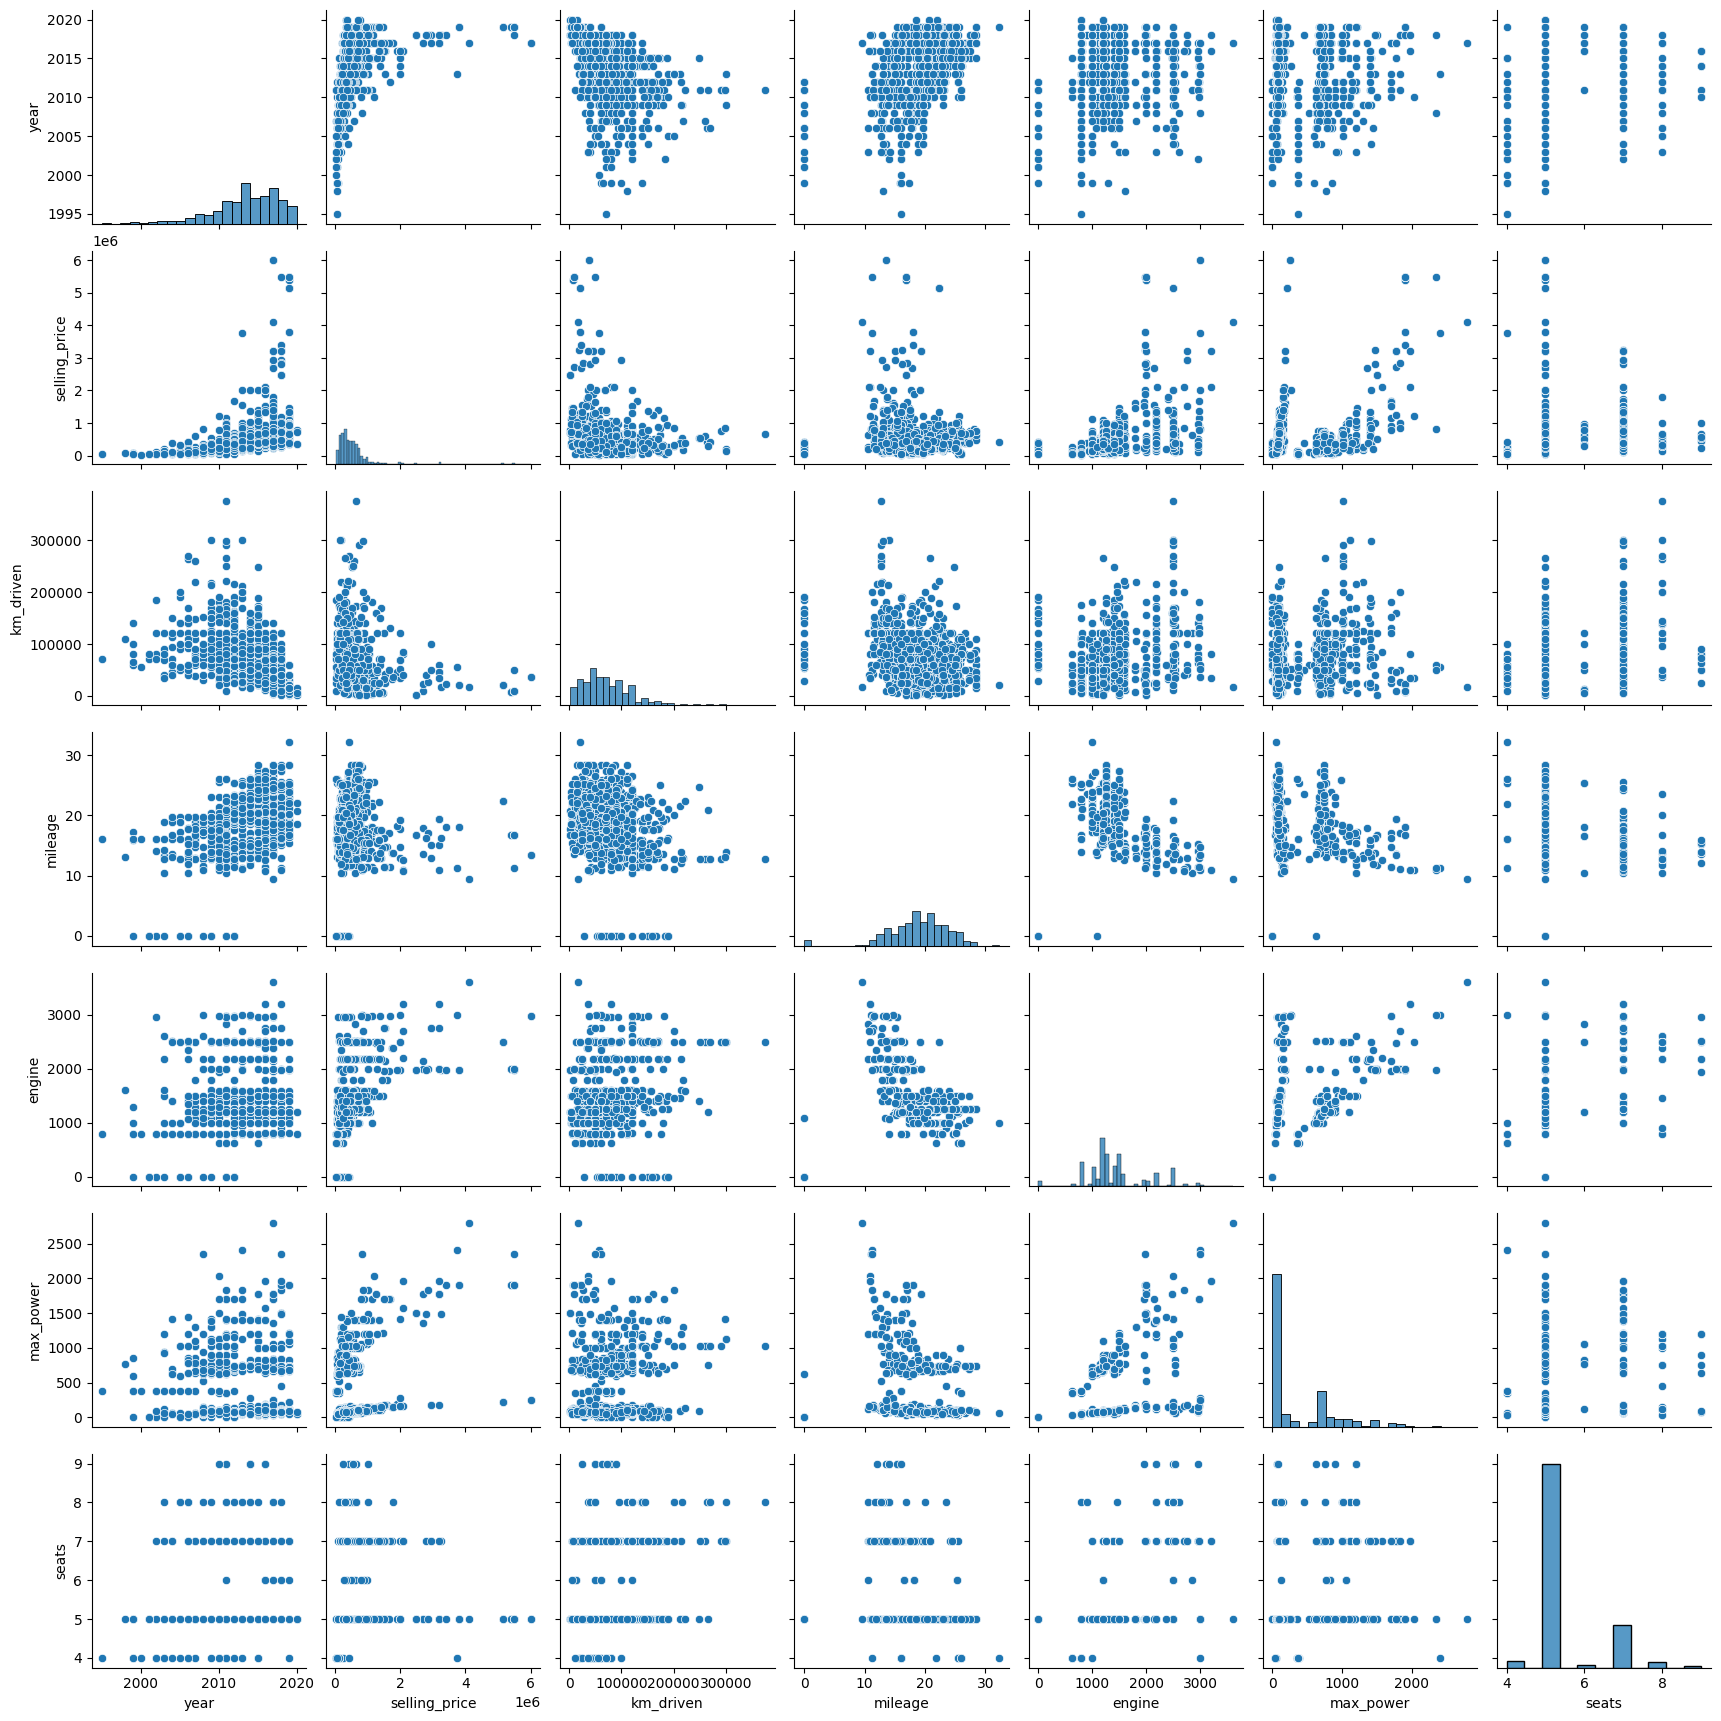

In [ ]:
sns.pairplot(df_test.select_dtypes(include=[np.number]))

`Распределения для трейна и теста достаточно похожи, не считая того, что для теста распределения km_driven сильнее смещены вправо`

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [ ]:
c_corr = df_train.select_dtypes(include=[np.number]).corr()
c_corr

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.413242,-0.411504,0.408343,0.137346,-0.024479,0.010536
selling_price,0.413242,1.000000,-0.222218,-0.040553,0.444634,0.400761,0.044614
km_driven,-0.411504,-0.222218,1.000000,-0.163758,0.145019,0.053144,0.209669
mileage,0.408343,-0.040553,-0.163758,1.000000,-0.117416,-0.131681,-0.300514
engine,0.137346,0.444634,0.145019,-0.117416,1.000000,0.407268,0.576375
max_power,-0.024479,0.400761,0.053144,-0.131681,0.407268,1.000000,0.186848
seats,0.010536,0.044614,0.209669,-0.300514,0.576375,0.186848,1.000000


<Axes: >

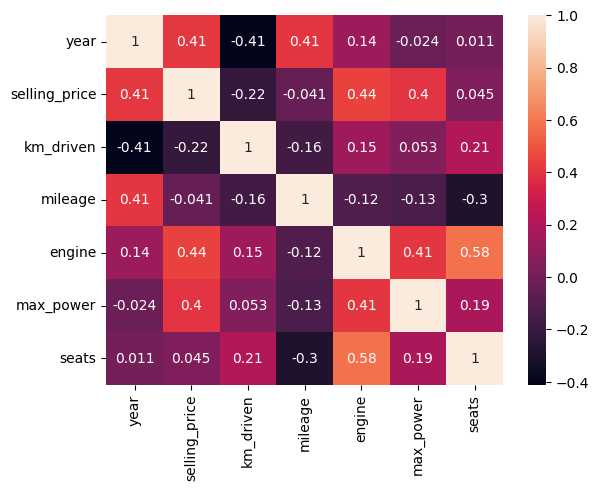

In [ ]:
sns.heatmap(c_corr,annot=c_corr)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

`наименьшая коррелляция у признаков year и seats.

наибольшая положительная линейная зависимость у признаков engine и seats.

Нет, мы не можем такое утверждать`

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

Text(0, 0.5, 'Частота')

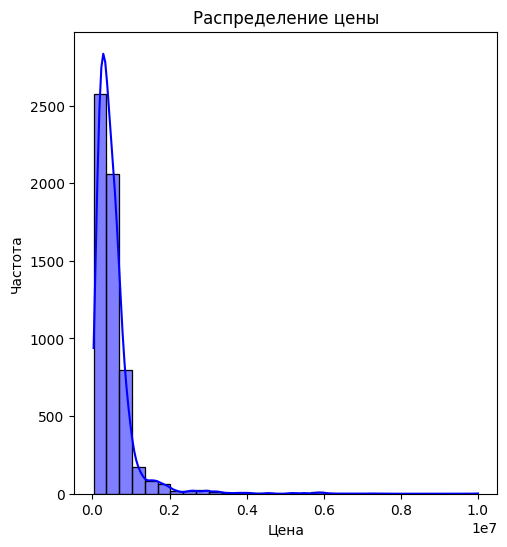

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_train['selling_price'], kde=True, color='blue', bins=30)
plt.title('Распределение цены')
plt.xlabel('Цена')
plt.ylabel('Частота')

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [26]:
from sklearn.model_selection import train_test_split
df_train.dtypes
df_train_1 = df_train.copy()
df_train_1 = df_train_1.drop(columns=['name','fuel','seller_type','transmission','owner','torque'])
df_train_1

,year,selling_price,km_driven,mileage,engine,max_power,seats
0,2014,450000,145500,23.4 kmpl,1248 CC,74 bhp,5.0
1,2014,370000,120000,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,2010,225000,127000,23.0 kmpl,1396 CC,90 bhp,5.0
3,2007,130000,120000,16.1 kmpl,1298 CC,88.2 bhp,5.0
4,2017,440000,45000,20.14 kmpl,1197 CC,81.86 bhp,5.0
...,...,...,...,...,...,...,...
6994,2013,320000,110000,18.5 kmpl,1197 CC,82.85 bhp,5.0
6995,2007,135000,119000,16.8 kmpl,1493 CC,110 bhp,5.0
6996,2009,382000,120000,19.3 kmpl,1248 CC,73.9 bhp,5.0
6997,2013,290000,25000,23.57 kmpl,1396 CC,70 bhp,5.0


In [28]:
df_test_1 = df_test.copy()
df_test_1 = df_test_1.drop(columns=['name','fuel','seller_type','transmission','owner','torque'])

In [29]:
y_train = df_train_1['selling_price']
X_train = df_train_1.drop(columns=['selling_price'])

In [ ]:
assert X_train.shape == (5840, 6)

In [30]:
y_test = df_test_1['selling_price']
X_test = df_test_1.drop(columns=['selling_price'])

In [ ]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model_base = LinearRegression()
model_base.fit(X_train, y_train)
y_pred = model_base.predict(X_test)

print(f" r2 - {r2_score(y_test, y_pred)}, mse - {MSE(y_test, y_pred)}")

ValueError: could not convert string to float: '23.4 kmpl'

Метрика r2 неплохая для бейзлайна, mse выглядит страшновато, но пока не с чем сравнивать.

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)


In [ ]:

model_base_sc = LinearRegression()
model_base_sc.fit(X_train_sc, y_train)
y_pred = model_base_sc.predict(X_test_sc)

print(f" r2 - {r2_score(y_test, y_pred)}, mse - {MSE(y_test, y_pred)}")

 r2 - 0.44770791295773826, mse - 317473262685.0453


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [33]:
model_base_sc.coef_

array([ 252791.83844205,  -47699.99958462, -135325.84149473,
        260915.66293039,   63256.03568873, -135865.26767576])

Наибольший коэффициент у признака engine

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [34]:
from sklearn.linear_model import Lasso

model_lasso = Lasso()
model_lasso.fit(X_train_sc, y_train)
y_pred = model_lasso.predict(X_test_sc)

In [35]:
print(f" r2 - {r2_score(y_test, y_pred)}, mse - {MSE(y_test, y_pred)}")

 r2 - 0.4477056275680399, mse - 317474576392.3047


In [36]:
model_lasso.coef_

array([ 252790.10252543,  -47699.30169012, -135323.28809768,
        260913.1769827 ,   63255.24150417, -135861.86608831])

Модель не занулила веса, кроме того качество метрики mse ухудшилось

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [37]:
from sklearn.model_selection import GridSearchCV


lasso = Lasso(max_iter=10000)

param_grid = {
    'alpha': np.logspace(-4, 0, 50)
}
grid_search = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=10,
    n_jobs=-1,
    verbose=1
)


In [38]:

grid_search.fit(X_train_sc, y_train)

print(f"Лучшее значение alpha: {grid_search.best_params_['alpha']}")
print(f"Лучшее значение MSE: {-grid_search.best_score_}")

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Лучшее значение alpha: 0.00012067926406393288
Лучшее значение MSE: 170588337282.00372


In [39]:
best_model_lasso = grid_search.best_estimator_
y_pred = best_model_lasso.predict(X_test_sc)
print(f" r2 - {r2_score(y_test, y_pred)}, mse - {MSE(y_test, y_pred)}")

 r2 - 0.4477079127682104, mse - 317473262793.99133


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [40]:
from sklearn.linear_model import ElasticNet


en = ElasticNet(max_iter=10000)

param_grid = {
    'alpha': np.logspace(-4, 1, 50),
    'l1_ratio': np.linspace(0, 1, 11)
}

grid_search = GridSearchCV(
    estimator=en,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=10,
    n_jobs=-1,
    verbose=1
)

In [41]:
grid_search.fit(X_train_sc, y_train)

print(f"Лучшие параметры (alpha и l1_ratio): {grid_search.best_params_}")
print(f"Лучшее значение MSE: {-grid_search.best_score_}")

Fitting 10 folds for each of 550 candidates, totalling 5500 fits


/Users/arinagovorova/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.441e+14, tolerance: 1.535e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/arinagovorova/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.542e+14, tolerance: 1.564e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one

Лучшие параметры (alpha и l1_ratio): {'alpha': np.float64(0.006866488450042998), 'l1_ratio': np.float64(0.30000000000000004)}
Лучшее значение MSE: 170580082482.44528


/Users/arinagovorova/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.221e+14, tolerance: 1.507e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [42]:
best_model_el = grid_search.best_estimator_
y_pred = best_model_el.predict(X_test_sc)


print(f" r2 - {r2_score(y_test, y_pred)}, mse - {MSE(y_test, y_pred)}")

 r2 - 0.4460541046957128, mse - 318423918899.60834


грид-сёрч отработал достаточно быстро. Лучшие параметры выведены выше.

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [82]:
df_train_2 = pd.DataFrame(df_train.copy())

In [83]:
df_test_2 = pd.DataFrame(preprocess(df_test.copy()))

In [84]:
df_test_2

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.00,2498.0,1121.000,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.50,1497.0,108.510,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.90,1799.0,1301.000,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.10,1498.0,98.610,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.50,1172.0,651.000,96 Nm at 3000 rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81,1086.0,68.051,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197.0,81.831,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.00,1396.0,901.000,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36,1197.0,78.910,111.8Nm@ 4000rpm,5.0


In [ ]:
df_train_2 = df_train_2.drop(columns=['name','torque'])
df_test_2 = df_test_2.drop(columns=['name','torque'])

In [85]:
df_train_2 = process_dataset(df_train.copy())
df_test_2 = process_dataset(df_test.copy())

In [86]:
X_train_cat = df_train_2
X_test_cat = df_test_2
y_train_cat = y_train
y_test_cat = y_test

In [45]:
X_train_cat = df_train_2.drop(columns=['selling_price'])
y_train_cat = df_train_2['selling_price']
X_test_cat = df_test_2.drop(columns=['selling_price'])

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [ ]:
X_train_cat = df_train_2

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [45]:
assert X_train_cat.shape == (5840, 10)

In [87]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,6999,6999,6999,6999
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3793,5826,6095,4587


### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [88]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas
from sklearn.compose import ColumnTransformer

ohe_encoder = OneHotEncoder(drop='first')
cat_columns=['fuel', 'seats','seller_type','owner','transmission']

ss_encoder = StandardScaler()
num_columns = ['mileage', 'engine', 'max_power', 'km_driven', 'year']

column_transformer = ColumnTransformer(
    transformers=[
            ('num', ss_encoder, num_columns),
            ('cat', ohe_encoder, cat_columns)], remainder='passthrough'
            )
X_train_cat = column_transformer.fit_transform(X_train_cat)
X_test_cat = column_transformer.transform(X_test_cat)


X_train_cat = pd.DataFrame(X_train_cat, columns=column_transformer.get_feature_names_out())
X_test_cat = pd.DataFrame(X_test_cat, columns= column_transformer.get_feature_names_out())

In [117]:

clf = Pipeline(steps=[('preprocessor', column_transformer),
                      ('classifier', best_model_ridge)])


In [118]:
with open('piper.pkl', 'wb') as file:
    pickle.dump(clf, file)

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [89]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': np.logspace(-4, 4, 50)
}
ridge = Ridge()

grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring='r2',
    cv=10,
    n_jobs=-1,
    verbose=1
)


In [90]:
X_test_cat.isna().sum()


num__mileage                         0
num__engine                          0
num__max_power                       0
num__km_driven                       0
num__year                            0
cat__fuel_Diesel                     0
cat__fuel_LPG                        0
cat__fuel_Petrol                     0
cat__seats_4                         0
cat__seats_5                         0
cat__seats_6                         0
cat__seats_7                         0
cat__seats_8                         0
cat__seats_9                         0
cat__seats_10                        0
cat__seats_14                        0
cat__seller_type_Individual          0
cat__seller_type_Trustmark Dealer    0
cat__owner_Fourth & Above Owner      0
cat__owner_Second Owner              0
cat__owner_Test Drive Car            0
cat__owner_Third Owner               0
cat__transmission_Manual             0
dtype: int64

In [91]:
grid_search.fit(X_train_cat, y_train)

print(f"alpha: {grid_search.best_params_['alpha']}")
print(f"R2: {grid_search.best_score_}")

Fitting 10 folds for each of 50 candidates, totalling 500 fits
alpha: 11.513953993264458
R2: 0.5785047159749992


In [119]:
best_model_ridge = grid_search.best_estimator_
y_pred = best_model_ridge.predict(X_test_cat)


print(f" r2 - {r2_score(y_test, y_pred)}, mse - {MSE(y_test, y_pred)}")

 r2 - 0.6145319301752179, mse - 221578053822.1185


Качество прогноза заметно улучшилось. Это связано с категоризацией макисмально возможного кол-ва признаков.

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [120]:
def business_metric(y_true, y_pred):
    errors = np.abs(y_true - y_pred) / y_true
    correct_predictions = np.sum(errors <= 0.1)
    return correct_predictions / len(y_true)

business_metric(y_test, y_pred)

0.149

In [52]:
model_est = {}
model_est['model_base'] = business_metric(y_test, model_base.predict(X_test))
model_est['model_base_sc'] = business_metric(y_test, model_base_sc.predict(X_test_sc))
model_est['model_lasso'] = business_metric(y_test, model_lasso.predict(X_test_sc))
model_est['best_model_lasso'] = business_metric(y_test, best_model_lasso.predict(X_test_sc))
model_est['best_model_el'] = business_metric(y_test, best_model_el.predict(X_test_sc))
model_est['best_model_ridge'] = business_metric(y_test, best_model_ridge.predict(X_test_cat))
model_est

{'model_base': np.float64(0.17),
 'model_base_sc': np.float64(0.17),
 'model_lasso': np.float64(0.17),
 'best_model_lasso': np.float64(0.17),
 'best_model_el': np.float64(0.172),
 'best_model_ridge': np.float64(0.185)}

`лучшие метрики как бизнесовые так и mse и r2 оказались у последней модели. Это объяснимо, так как использование максимального кол-ва признаков вместе с их кодированием на группах и хорошо настраиваемой моделью позволяет лучше рассчитать коэффициенты регрессии.`

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [14]:
!pip3 install "fastapi[all]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 878.4 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.7/248.7 kB 2.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 2.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.0/457.0 kB 3.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.8/198.8 kB 3.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.6/159.6 kB 3.0 MB/s e

In [110]:
!pip3 install fastapi.encoders

ERROR: Could not find a version that satisfies the requirement fastapi.encoders (from versions: none)
ERROR: No matching distribution found for fastapi.encoders


In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from contextlib import asynccontextmanager
from typing import List
import pickle 

from sklearn.preprocessing import OneHotEncoder ,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

PATH = 'https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv'

def process_dataset(df):
    df = df.drop(columns=['name', 'torque', 'selling_price'], errors='ignore')
    df['mileage'] = df['mileage'].astype(str).str.replace(' kmpl', '', regex=False)
    df['mileage'] = df['mileage'].astype(str).str.replace(' km/kg', '', regex=False).astype(float)
    df['engine'] = df['engine'].astype(str).str.replace(' CC', '', regex=False).astype(float)
    df['max_power'] = df['max_power'].astype(str).str.replace('1 bhp', ' bhp', regex=False)
    df['max_power'] = df['max_power'].astype(str).str.replace(' bhp', '', regex=False).astype(float)
    df['engine'] = df['engine'].fillna(0).astype(int)
    df['seats'] = df['seats'].fillna(0).astype(int)
    return df

def pipeline(df):
    cat_columns = ['fuel', 'seats', 'seller_type', 'owner', 'transmission']
    num_columns = ['mileage', 'engine', 'max_power', 'km_driven', 'year']

    numeric_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(drop='first',handle_unknown='ignore')

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, num_columns),
            ('cat', categorical_transformer, cat_columns)
        ], remainder='passthrough'
    )
    transformed_data = column_transformer.transform(df)
    #transformed_data = preprocessor.fit_transform(df)
    return pd.DataFrame(transformed_data, columns=preprocessor.get_feature_names_out())

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float

class selling_price(Item):
    prediction: float

class Items(BaseModel):
    objects: List[Item]

#, response_model=selling_price
@app.post("/predict_item")
def predict_item(item: Item) -> float:
    with open("./model.pkl", 'rb') as model_file:
        loaded_model = pickle.load(model_file)
    x_df = pd.DataFrame(item, index=[0])
    prod = process_dataset(x_df)
    pi = pipeline(prod)
    res = loaded_model.predict(pi)[0]
    return res


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    with open("./model.pkl", 'rb') as model_file:
        loaded_model = pickle.load(model_file)
    data = [item.dict() for item in items]
    df = pd.DataFrame(data)
    predictions = loaded_model.predict(process_dataset(df)[0])
    return predictions.tolist()

In [112]:
df_train_2.sample()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
6565,2019,35000,Petrol,Individual,Manual,First Owner,23.01,999,671.0,5


In [93]:
import pickle 
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model_ridge, file)

In [113]:
with open('ct.pkl', 'wb') as file:
    pickle.dump(column_transformer, file)

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>



прекрасный кот! угадывать не возьмусь)